In [115]:
# Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.lines as mlines
import seaborn as sns

In [116]:
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

def download_file(file_id, file_name):
  downloaded = drive.CreateFile({'id': file_id})
  downloaded.GetContentFile(file_name)

In [117]:
# 'posting.csv' dataset: https://drive.google.com/file/d/150UcPZYXz_L5J3S3nOHaMG3bLdL-3iAs/view?usp=sharing
download_file('150UcPZYXz_L5J3S3nOHaMG3bLdL-3iAs', 'postings.csv')

# company
download_file('1Ime723DZCukysh2UGlLN9SXmAvtXXuBK', 'companies.csv')
download_file('1mYd_uVIjtklSyLecpkqa-OTxFhEUAc2A', 'company_industries.csv')
download_file('1bd9qlhly8rVgmLhvEfqg_9fKyzufujQu', 'company_specialities.csv')
download_file('1_2RKNP3APFL_kVUw1xneNtAP78MOLgQP', 'employee_counts.csv')

# jobs
download_file('1gVkQHzzNOivqU3DCyQ_hbJ3dhAZUNZ28', 'benefits.csv')
download_file('1qOeJg-E1CBTbd5ZjLvF5fitlgNYm_Cid', 'job_industries.csv')
download_file('1c8NCg4SmnDFZBaMNNmZig9b6hasA55vr', 'job_skills.csv')
download_file('1AmFFtziv4rUgA2CJmp9cHZPUlDLp7lmJ', 'salaries.csv')

# mappings
download_file('1K5NuH_6l42qJie3jcfCfSEYCn2irilyh', 'industries.csv')
download_file('1koWdPW_f10-fpepgrhlGj3uaikG8pELI', 'skills.csv')

In [118]:
postings = pd.read_csv('postings.csv')

companies = pd.read_csv('companies.csv')
company_industries = pd.read_csv('company_industries.csv')
company_specialities = pd.read_csv('company_specialities.csv')
employee_counts = pd.read_csv('employee_counts.csv')

benefits = pd.read_csv('benefits.csv')
job_industries = pd.read_csv('job_industries.csv')
job_skills = pd.read_csv('job_skills.csv')
salaries = pd.read_csv('salaries.csv')

industries = pd.read_csv('industries.csv')
skills = pd.read_csv('skills.csv')

In [119]:
# companies['country'].value_counts()
companies_us = companies[companies['country'] == 'US']
companies_us.head(1)

,company_id,name,description,company_size,state,country,city,zip_code,address,url
0,1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm


In [120]:
company_industries.head(1)

,company_id,industry
0,391906,Book and Periodical Publishing


In [121]:
company_specialities.head(1)

,company_id,speciality
0,22292832,window replacement


In [122]:
employee_counts_clean = employee_counts[employee_counts['employee_count'] > 0]
employee_counts_clean[employee_counts_clean['follower_count'] > 0]
employee_counts_clean.head(1)

,company_id,employee_count,follower_count,time_recorded
0,391906,186,32508,1712346173


In [123]:
benefits.head(1)

,job_id,inferred,type
0,3887473071,0,Medical insurance


In [124]:
job_industries.head(1)

,job_id,industry_id
0,3884428798,82


In [125]:
job_skills.head(1)

,job_id,skill_abr
0,3884428798,MRKT


In [126]:
salaries.head(1)

,salary_id,job_id,max_salary,med_salary,min_salary,pay_period,currency,compensation_type
0,1,3884428798,NaN,20.0,NaN,HOURLY,USD,BASE_SALARY


In [127]:
salaries['currency'].unique()

array(['USD', 'CAD', 'BBD', 'EUR', 'AUD', 'GBP'], dtype=object)

In [128]:
# salaries have different currencies. make it all usd adjusting to the currrent exchange rate

# Assuming you have a way to get the current exchange rates
# This is a placeholder, replace with a real API call or data source
def get_exchange_rate(currency):
  exchange_rates = {
      'USD': 1.0,
      'EUR': 0.95,
      # https://www.ecb.europa.eu/stats/policy_and_exchange_rates/euro_reference_exchange_rates/html/eurofxref-graph-usd.en.html
      'GBP': 0.79,
      # https://www.xe.com/currencyconverter/convert/?Amount=1&From=USD&To=GBP
      'CAD': 1.4,
      # https://www.xe.com/currencyconverter/convert/?Amount=1&From=USD&To=CAD
      'AUD': 1.5,
      # https://www.xe.com/currencyconverter/convert/?Amount=1&From=USD&To=AUD
      'BBD': 2
      # https://www.xe.com/currencyconverter/convert/?Amount=1&From=USD&To=BBD
  }
  return exchange_rates.get(currency, 1.0)  # Default to 1.0 if currency not found

# Ask Memo for his saary column
# Convert salaries to USD
# salaries['salary_usd'] = salaries.apply(lambda row: row['salary'] * get_exchange_rate(row['currency']), axis=1)

# # Display updated dataframe
# print(salaries[['salary', 'currency', 'salary_usd']].head())

In [129]:
postings.head(1)

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0


In [130]:
# percentage of missing values for each column
missing_percentage = postings.isnull().mean() * 100
missing_percentage

,0
job_id,0.000000
company_name,1.387981
title,0.000000
description,0.005652
max_salary,75.944093
pay_period,70.873402
location,0.000000
company_id,1.386366
views,1.363757
med_salary,94.929309


# Analysis and descriptive statistics

In [131]:
merged_postings = pd.merge(postings, employee_counts_clean[['company_id', 'follower_count']], on='company_id', how='left')

In [132]:
# Group by company and aggregating the number of job postings and followers
company_agg = merged_postings.groupby('company_name').agg({
    'job_id': 'count',
    'follower_count': 'mean'  # mean because count is repeated for the same company
}).rename(columns={'job_id': 'number_of_jobs'})

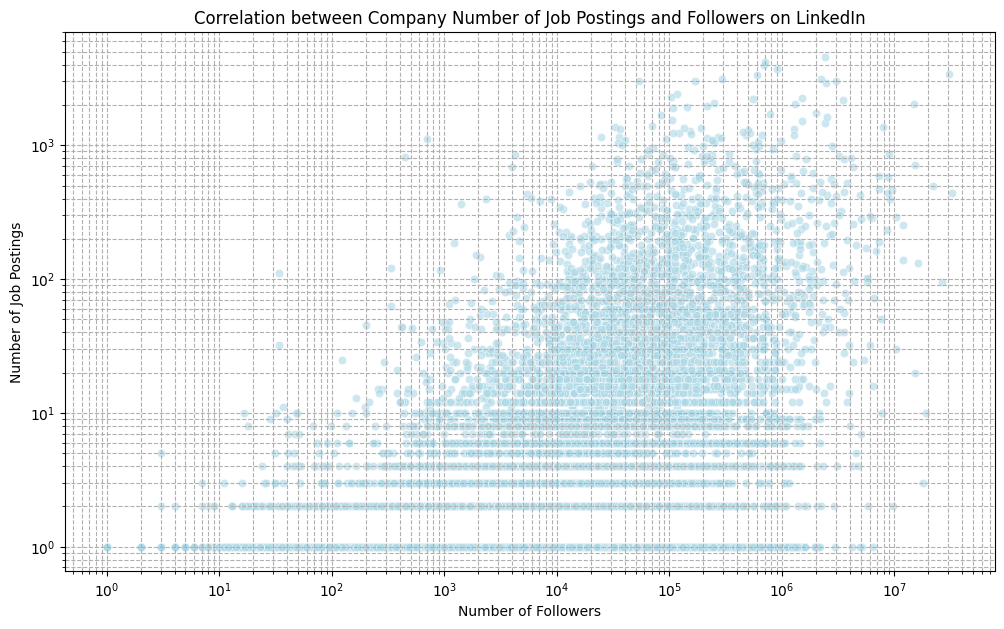

In [133]:
plt.figure(figsize=(12, 7))
sns.scatterplot(data=company_agg, x='follower_count', y='number_of_jobs', alpha=0.6, color='lightblue')
plt.title('Correlation between Company Number of Job Postings and Followers on LinkedIn')

plt.xlabel('Number of Followers')
plt.xscale('log')

plt.ylabel('Number of Job Postings')
plt.yscale('log')

plt.grid(True, which="both", ls="--")
plt.show()

## Hypothesis 1: Job level

Hypothesis: Senior roles (e.g., manager, director) are less likely to offer remote work options compared to entry- and mid-level positions.

In [134]:
merged_postings['work_type'].unique()

array(['FULL_TIME', 'INTERNSHIP', 'CONTRACT', 'PART_TIME', 'TEMPORARY',
       'VOLUNTEER', 'OTHER'], dtype=object)

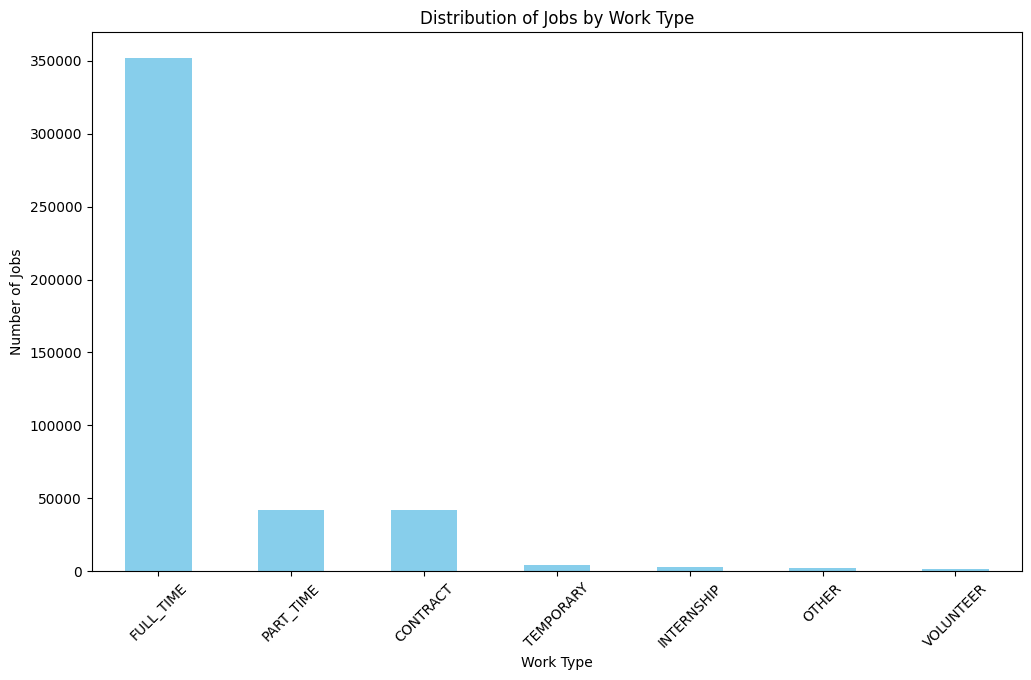

In [135]:
# Distribution of jobs by work type
work_type_distribution = merged_postings['work_type'].value_counts()

# Plot
plt.figure(figsize=(12, 7))
work_type_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Jobs by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.show()

In [136]:
merged_postings[merged_postings['remote_allowed'] == 1]['work_type'].unique()

array(['CONTRACT', 'FULL_TIME', 'PART_TIME', 'VOLUNTEER', 'INTERNSHIP',
       'OTHER', 'TEMPORARY'], dtype=object)

In [137]:
merged_postings['remote_allowed'].unique()

array([nan,  1.])

In [138]:
merged_postings['formatted_experience_level'].unique()

array([nan, 'Entry level', 'Mid-Senior level', 'Associate', 'Director',
       'Internship', 'Executive'], dtype=object)

In [139]:
merged_postings['formatted_experience_level'] = np.where(
    (merged_postings['formatted_experience_level'].isnull()) & (merged_postings['work_type'].isin(['VOLUNTEER', 'INTERNSHIP'])),
    'Entry level', merged_postings['formatted_experience_level'])

filtered_postings = merged_postings.dropna(subset=['formatted_experience_level', 'remote_allowed'])

In [140]:
# Categorize experience levels into broader groups
def categorize_experience(level):
    if level in ['Entry level', 'Associate', 'Internship']:
        return 'Entry-Level'
    elif level == 'Mid-Senior level':
        return 'Mid-Level'
    elif level in ['Director', 'Executive']:
        return 'Senior-Level'
    else:
        return 'Other'

filtered_postings['experience_category'] = filtered_postings['formatted_experience_level'].apply(categorize_experience)

<ipython-input-140-b23bfb2fad6b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_postings['experience_category'] = filtered_postings['formatted_experience_level'].apply(categorize_experience)


In [147]:
# Calculate the percentage proportion of remote jobs by experience category
remote_jobs = filtered_postings[filtered_postings['remote_allowed'] == 1]

remote_count = remote_jobs.groupby('experience_category')['remote_allowed'].count()
total_remote_jobs = remote_jobs['remote_allowed'].count()
remote_summary = (remote_count / total_remote_jobs * 100).reset_index()
remote_summary.columns = ['Experience Level', 'Percentage Remote Allowed']
remote_summary

,Experience Level,Percentage Remote Allowed
0,Entry-Level,31.107748
1,Mid-Level,61.246973
2,Senior-Level,7.645278


In [148]:
remote_jobs.columns

Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'company_id', 'views', 'med_salary',
       'min_salary', 'formatted_work_type', 'applies', 'original_listed_time',
       'remote_allowed', 'job_posting_url', 'application_url',
       'application_type', 'expiry', 'closed_time',
       'formatted_experience_level', 'skills_desc', 'listed_time',
       'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type', 'normalized_salary', 'zip_code', 'fips',
       'follower_count', 'experience_category'],
      dtype='object')

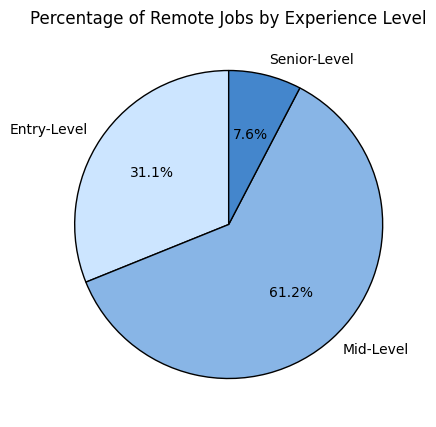

In [142]:
# light-to-dark color gradient
colors = list(mcolors.LinearSegmentedColormap.from_list("light_to_dark", ["#cce5ff", "#0056b3"])([i/3 for i in range(3)]))

plt.figure(figsize=(5, 5))
plt.pie(
    remote_summary['Percentage Remote Allowed'],
    labels=remote_summary['Experience Level'],
    autopct='%1.1f%%',  # Format percentages with 1 decimal place
    startangle=90,  # Rotate the pie chart for better orientation
    colors=colors,  # Light-to-dark colors
    wedgeprops={'edgecolor': 'black'}  # Add border to the slices
)
plt.title('Percentage of Remote Jobs by Experience Level')
plt.show()


In [143]:
# Calculate proportions of remote work by experience category
remote_summary = filtered_postings.groupby('experience_category')['remote_allowed'].count().reset_index()
remote_summary.columns = ['Experience Level', 'Proportion Remote Allowed']

print(remote_summary)

  Experience Level  Proportion Remote Allowed
0      Entry-Level                      10278
1        Mid-Level                      20236
2     Senior-Level                       2526


In [146]:
remote_jobs.columns

Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'company_id', 'views', 'med_salary',
       'min_salary', 'formatted_work_type', 'applies', 'original_listed_time',
       'remote_allowed', 'job_posting_url', 'application_url',
       'application_type', 'expiry', 'closed_time',
       'formatted_experience_level', 'skills_desc', 'listed_time',
       'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type', 'normalized_salary', 'zip_code', 'fips',
       'follower_count'],
      dtype='object')

In [150]:
filtered_postings_top10.columns

Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'company_id', 'views', 'med_salary',
       'min_salary', 'formatted_work_type', 'applies', 'original_listed_time',
       'remote_allowed', 'job_posting_url', 'application_url',
       'application_type', 'expiry', 'closed_time',
       'formatted_experience_level', 'skills_desc', 'listed_time',
       'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type', 'normalized_salary', 'zip_code', 'fips',
       'follower_count'],
      dtype='object')

In [151]:
# Check on sample of top 10 companies
top_companies = filtered_postings['company_name'].value_counts().head(10).index
filtered_postings_top10 = filtered_postings[filtered_postings['company_name'].isin(top_companies)]
remote_jobs = filtered_postings_top10[filtered_postings_top10['remote_allowed'] == 1]


remote_count = remote_jobs.groupby('experience_category')['remote_allowed'].count()
total_remote_jobs = remote_jobs['remote_allowed'].count()
remote_summary = (remote_count / total_remote_jobs * 100).reset_index()
remote_summary.columns = ['Experience Level', 'Percentage Remote Allowed']
remote_summary

,Experience Level,Percentage Remote Allowed
0,Entry-Level,25.493937
1,Mid-Level,70.581823
2,Senior-Level,3.924240


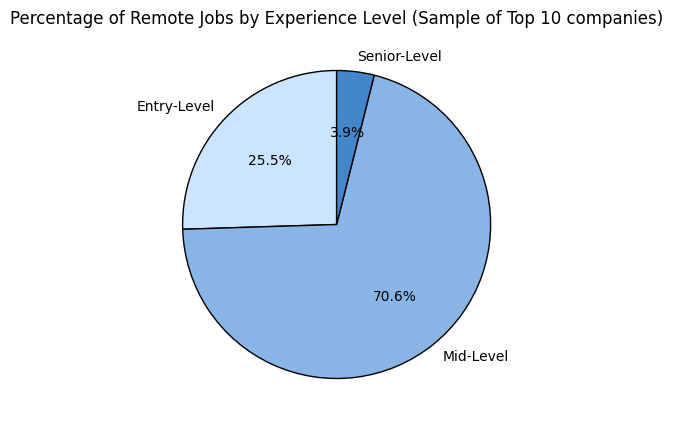

In [152]:
# light-to-dark color gradient
colors = list(mcolors.LinearSegmentedColormap.from_list("light_to_dark", ["#cce5ff", "#0056b3"])([i/3 for i in range(3)]))

plt.figure(figsize=(5, 5))
plt.pie(
    remote_summary['Percentage Remote Allowed'],
    labels=remote_summary['Experience Level'],
    autopct='%1.1f%%',  # Format percentages with 1 decimal place
    startangle=90,  # Rotate the pie chart for better orientation
    colors=colors,  # Light-to-dark colors
    wedgeprops={'edgecolor': 'black'}  # Add border to the slices
)
plt.title('Percentage of Remote Jobs by Experience Level (Sample of Top 10 companies)')
plt.show()


## Hypothesis 2: Demand of SQL skills by industry
Hypothesis: SQL is more frequently required in data-centric industries such as finance, healthcare, and e-commerce compared to other sectors.

In [102]:
merged_postings['requires_sql'] = (
    merged_postings['skills_desc'].str.contains(r'\bsql\b', case=False, na=False) |
    merged_postings['description'].str.contains(r'\bsql\b', case=False, na=False)
).astype(int)
merged_postings['requires_sql'].value_counts()

In [104]:
merged_postings1 = pd.merge(merged_postings, company_industries, on='company_id', how='left')
merged_postings1.head(1)

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips,follower_count,requires_sql,industry
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0,2351.0,0,Real Estate


In [105]:
comp_merged = pd.merge(merged_postings1, companies_us[['company_id', 'company_size']], on='company_id', how='left')
comp_merged.head(1)

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,work_type,currency,compensation_type,normalized_salary,zip_code,fips,follower_count,requires_sql,industry,company_size
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0,2351.0,0,Real Estate,2.0


In [106]:
# Filter the dataset to only include rows where 'requires_sql' is 1
sql_postings = comp_merged[comp_merged['requires_sql'] == 1]


In [107]:
# Group by 'industry' to calculate metrics
industry_summary = sql_postings.groupby('industry').agg(
    company_count=('requires_sql', 'count'),       # Number of companies
    avg_company_size=('company_size', 'mean')     # Average company size
).reset_index()


In [108]:
# Sort by 'company_count' and select the top 10 industries
top_industries = industry_summary.sort_values('company_count', ascending=False).head(10)
top_industries

,industry,company_count,avg_company_size
38,IT Services and IT Consulting,6036,4.874124
74,Software Development,2975,5.717875
27,Financial Services,2781,6.778027
77,Staffing and Recruiting,2562,4.364094
36,Hospitals and Health Care,553,6.231054
41,Insurance,366,5.861357
12,Business Consulting and Services,355,5.695312
68,Retail,332,6.739938
79,Telecommunications,210,6.344498
8,Banking,190,6.302857


In [109]:
list(top_industries)

['industry', 'company_count', 'avg_company_size']

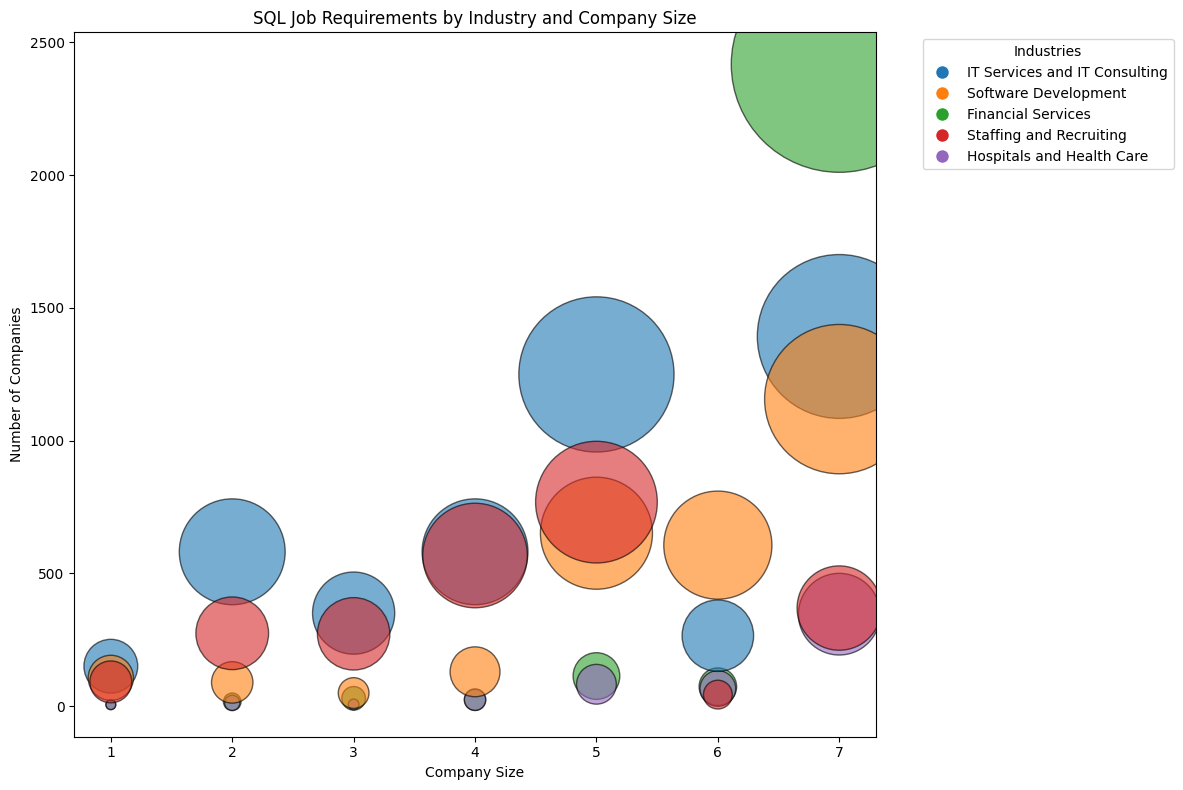

In [110]:
# Filter data and calculate the required metrics
sql_postings = comp_merged[comp_merged['requires_sql'] == 1]

# Group by industry and company size to calculate counts
industry_summary = sql_postings.groupby(['industry', 'company_size']).agg(
    company_count=('requires_sql', 'count')  # Number of companies
).reset_index()

# Get the top 10 industries based on total company counts
top_industries = (
    sql_postings.groupby('industry')['requires_sql'].count()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter only top 10 industries
top_industry_data = industry_summary[industry_summary['industry'].isin(top_industries)]

# Create a color palette for industries
palette = sns.color_palette('tab10', len(top_industries))
industry_colors = dict(zip(top_industries, palette))

# Create the bubble chart
plt.figure(figsize=(12, 8))

for industry, group in top_industry_data.groupby('industry'):
    plt.scatter(
        group['company_size'],
        group['company_count'],
        s=group['company_count'] * 10,  # Scale bubble size
        label=industry,
        alpha=0.6,
        color=industry_colors[industry],
        edgecolors='black'
    )

# Add labels and title
plt.xlabel('Company Size')
plt.ylabel('Number of Companies')
plt.title('SQL Job Requirements by Industry and Company Size')

# Custom legend with the real industry names
handles = [mlines.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10)
           for color in palette]
plt.legend(handles=handles, title='Industries', labels=list(top_industries), bbox_to_anchor=(1.05, 1))

plt.tight_layout()  # Adjust layout for readability

# Show the chart
plt.show()
